In [8]:
# Necessary imports
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [9]:
train_data = pd.read_csv('train_values.csv')
test_data = pd.read_csv('test_values.csv')

In [10]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [11]:
test_data['no_of_trainings'].value_counts()

1    18928
2     3544
3      755
4      190
5       36
6       24
7        9
9        2
8        2
Name: no_of_trainings, dtype: int64

In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               22456 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [14]:
#check data
print ('Train data has {} rows and {} columns'.format(train_data.shape[0],train_data.shape[1]))
print ('test_data data has {} rows and {} columns'.format(test_data.shape[0],test_data.shape[1]))

Train data has 54808 rows and 14 columns
test_data data has 23490 rows and 13 columns


## Imputing Missing Values

### Education

In [15]:
print('Missing Education Values: ',(len(train_data[train_data['education'].isna()])/train_data.shape[0])*100)

Missing Education Values:  4.395343745438622


####  Mode

In [16]:
train_data['education'].mode()

0    Bachelor's
dtype: object

In [17]:
train_data1 = train_data.copy(deep=True)

#train_data[train_data1['education'].isna()]
train_data1.loc[train_data1['education'].isna(), 'education'] = "Bachelor's"

train_data1[train_data1['education'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [18]:
test_data1 = test_data.copy(deep=True)

#train_data[train_data1['education'].isna()]
test_data1.loc[test_data1['education'].isna(), 'education'] = "Bachelor's"

test_data1[test_data1['education'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

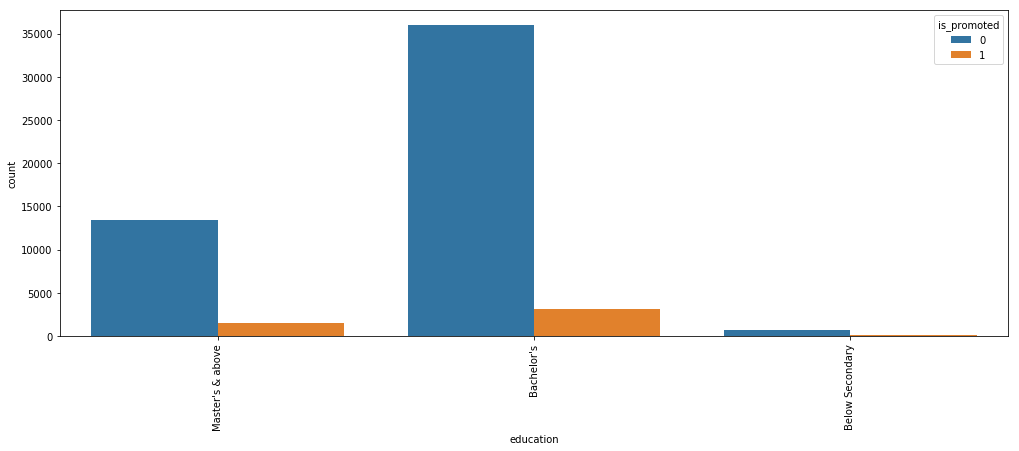

In [19]:
plt.figure(figsize=(17,6))
sns.countplot(train_data1.education,hue=train_data1.is_promoted)
plt.xticks(rotation=90)

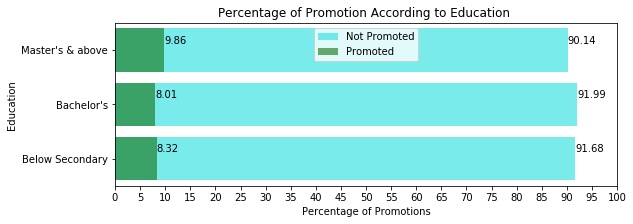

In [20]:
# "Percentage of Promotion According to Education "
req_list = list(train_data1['education'].unique())
req_list = [x for x in req_list if str(x) != 'nan']
not_promoted = []
promoted=[]
for i in req_list:
    x = train_data1[train_data1['education']==i]
    not_promoted.append((sum(x.is_promoted == 0)/len(x))*100)
    promoted.append((sum(x.is_promoted == 1)/len(x))*100)

# visualization
f,ax = plt.subplots(figsize = (9,3))

b1 = sns.barplot(x=not_promoted,y=req_list,color='cyan',alpha = 0.6,label='Not Promoted') 
b2 = sns.barplot(x=promoted,y=req_list,color='green',alpha = 0.6,label='Promoted')
for p in b1.patches:
    ax.annotate(str(float("{0:.2f}".format(p.get_width()))), (p.get_x() + p.get_width(), p.get_y()), xytext=(0, -15), textcoords='offset points',color='black')

ax.legend(loc='upper center',frameon = True)     # legend
ax.set(xlabel='Percentage of Promotions', ylabel='Education',title = "Percentage of Promotion According to Education ")

plt.xticks(np.arange(0,105,5))
#plt.grid(color='gray', linestyle='-', linewidth=0.5,axis='x')
plt.show()

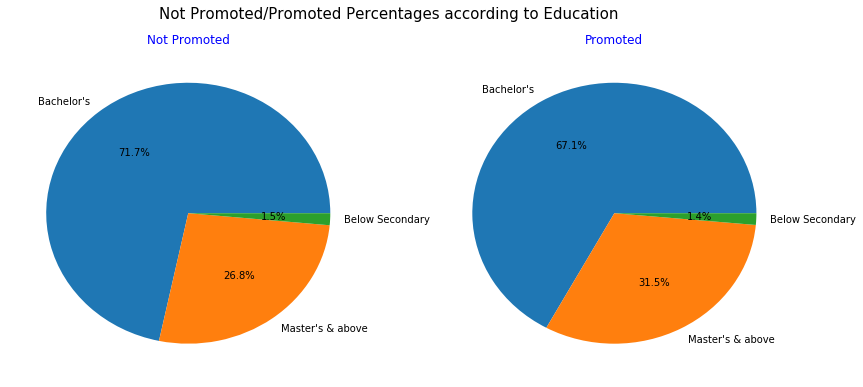

In [21]:
# Not Promoted/Promoted Percentages according to Regions
#train_df[train_df['is_promoted']==0]['department'].dropna(inplace = True)
df = train_data1[train_data1['is_promoted']==0]['education']
not_prom_nos = df.value_counts().nunique()
not_prom_labels = df.value_counts().index
not_prom_explode = list(np.zeros(not_prom_nos).astype(int))
not_prom_per = df.value_counts().values

df1 = train_data1[train_data1['is_promoted']==1]['education']
prom_nos = df1.value_counts().nunique()
prom_labels = df1.value_counts().index
prom_explode = list(np.zeros(prom_nos).astype(int))
prom_per = df1.value_counts().values

# visual
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.pie(not_prom_per,labels=not_prom_labels,explode=not_prom_explode, autopct='%1.1f%%')
#plt.legend(loc='center')
plt.title('Not Promoted',color = 'blue',fontsize = 12)

plt.subplot(1,2,2)
plt.pie(prom_per,labels=prom_labels, autopct='%1.1f%%')
plt.title('Promoted',color = 'blue',fontsize = 12)

plt.suptitle('Not Promoted/Promoted Percentages according to Education',fontsize = 15)
plt.show()

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


### Previous Year Rating

In [23]:
print('Missing Previous Year Rating Values: ',(len(train_data[train_data['previous_year_rating'].isin(['nan'])])/train_data.shape[0])*100)

Missing Previous Year Rating Values:  7.524448985549554


####  Mode

In [24]:
train_data['previous_year_rating'].mode()

0    3.0
dtype: float64

In [25]:

train_data.loc[train_data['previous_year_rating'].isin(['nan']), 'previous_year_rating'] = 3.0

train_data[train_data['previous_year_rating'].isin(['nan'])]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [26]:

test_data.loc[test_data['previous_year_rating'].isin(['nan']), 'previous_year_rating'] = 3.0

test_data[test_data['previous_year_rating'].isin(['nan'])]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

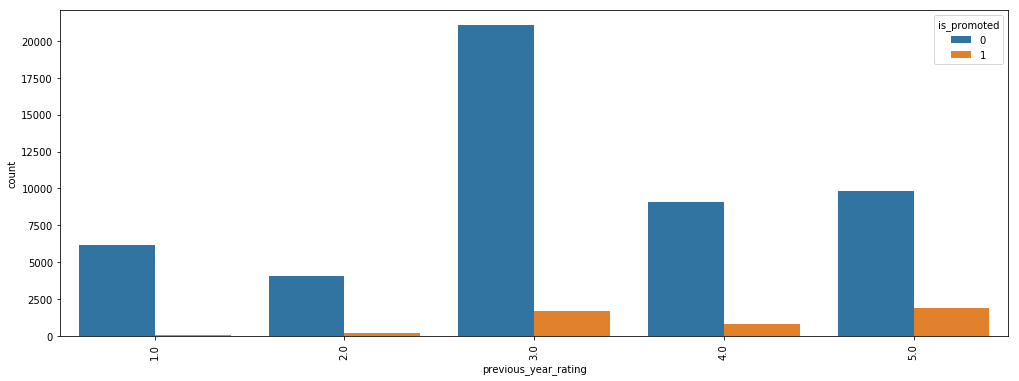

In [27]:
plt.figure(figsize=(17,6))
sns.countplot(train_data.previous_year_rating,hue=train_data.is_promoted)
plt.xticks(rotation=90)

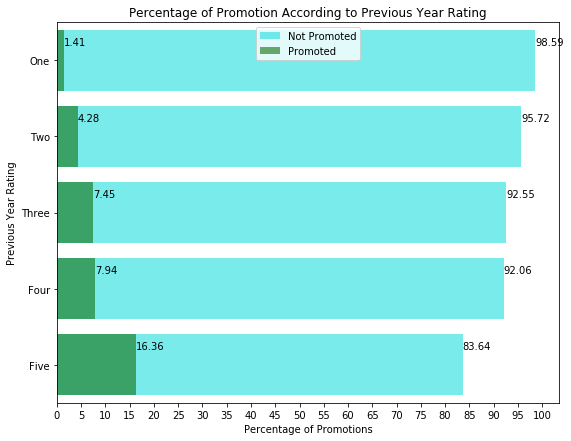

In [28]:
# "Percentage of Promotion According to Previous Year Rating "
train_data['previous_year_rating'] = train_data['previous_year_rating'].astype(object)
req_list = sorted(list(train_data['previous_year_rating'].unique()))
req_list = [x for x in req_list if str(x) != 'nan']

not_promoted = []
promoted=[]
for i in req_list:
    x = train_data[train_data['previous_year_rating']==i]
    not_promoted.append((sum(x.is_promoted == 0)/len(x))*100)
    promoted.append((sum(x.is_promoted == 1)/len(x))*100)

# visualization
f,ax = plt.subplots(figsize = (9,7))
req_list = ['One','Two','Three','Four','Five']
b1 = sns.barplot(x=not_promoted,y=req_list,color='cyan',alpha = 0.6,label='Not Promoted') 
b2 = sns.barplot(x=promoted,y=req_list,color='green',alpha = 0.6,label='Promoted')

# For displaying the percentage values
for p in b1.patches:
    ax.annotate(str(float("{0:.2f}".format(p.get_width()))), (p.get_x() + p.get_width(), p.get_y()), xytext=(0, -15), textcoords='offset points',color='black')

ax.legend(loc='upper center',frameon = True)     # legend
ax.set(xlabel='Percentage of Promotions', ylabel='Previous Year Rating',title = "Percentage of Promotion According to Previous Year Rating")

plt.xticks(np.arange(0,105,5))
plt.show()

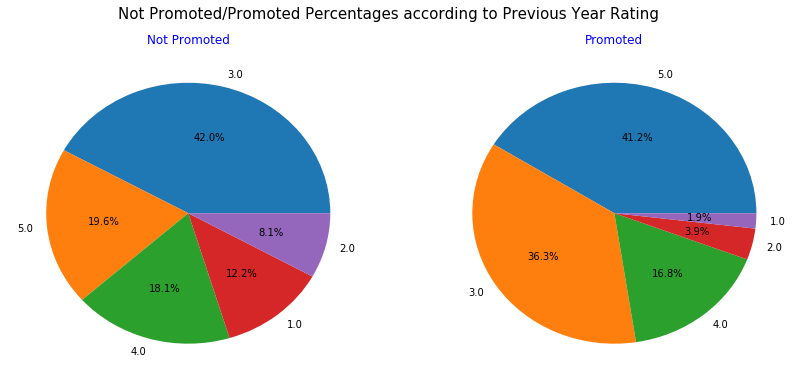

In [29]:
# Not Promoted/Promoted Percentages according to Previous Year Rating
#train_df[train_df['is_promoted']==0]['department'].dropna(inplace = True)
df = train_data[train_data['is_promoted']==0]['previous_year_rating']
not_prom_nos = df.value_counts().nunique()
not_prom_labels = df.value_counts().index
not_prom_explode = list(np.zeros(not_prom_nos).astype(int))
not_prom_per = df.value_counts().values

df1 = train_data[train_data['is_promoted']==1]['previous_year_rating']
prom_nos = df1.value_counts().nunique()
prom_labels = df1.value_counts().index
prom_explode = list(np.zeros(prom_nos).astype(int))
prom_per = df1.value_counts().values

# visual
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plt.pie(not_prom_per,labels=not_prom_labels,explode=not_prom_explode, autopct='%1.1f%%')
#plt.legend(loc='center')
plt.title('Not Promoted',color = 'blue',fontsize = 12)

plt.subplot(1,2,2)
plt.pie(prom_per,labels=prom_labels, autopct='%1.1f%%')
plt.title('Promoted',color = 'blue',fontsize = 12)

plt.suptitle('Not Promoted/Promoted Percentages according to Previous Year Rating',fontsize = 15)
plt.show()

## Feature Extraction

In [30]:
train_data['company_service_fraction'] = train_data['length_of_service'] / train_data['age']
test_data['company_service_fraction'] = test_data['length_of_service'] / test_data['age']


In [31]:
train_data['joining_age'] = train_data['age'] - train_data['length_of_service']
test_data['joining_age'] = test_data['age'] - test_data['length_of_service']

## No_of_trainings

In [32]:
(train_data['no_of_trainings'].value_counts()/train_data['no_of_trainings'].value_counts().sum())*100

1     80.969931
2     14.572690
3      3.240403
4      0.853890
5      0.233543
6      0.080280
7      0.021895
10     0.009123
9      0.009123
8      0.009123
Name: no_of_trainings, dtype: float64

In [33]:
train_data.loc[train_data['no_of_trainings'] > 3, 'no_of_trainings'] = "3+"
test_data.loc[test_data['no_of_trainings'] > 3, 'no_of_trainings'] = "3+"

In [34]:
(train_data['no_of_trainings'].value_counts()/train_data['no_of_trainings'].value_counts().sum())*100

1     80.969931
2     14.572690
3      3.240403
3+     1.216976
Name: no_of_trainings, dtype: float64

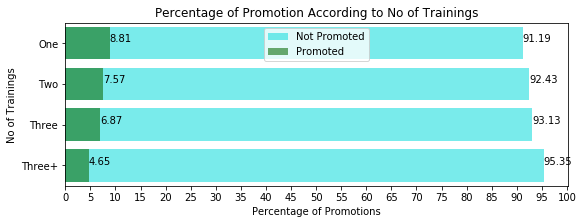

In [35]:
# "Percentage of Promotion According to No of Trainings "
train_data['no_of_trainings'] = train_data['no_of_trainings'].astype(object)
req_list = list(train_data['no_of_trainings'].unique())
req_list = [x for x in req_list if str(x) != 'nan']

not_promoted = []
promoted=[]
for i in req_list:
    x = train_data[train_data['no_of_trainings']==i]
    not_promoted.append((sum(x.is_promoted == 0)/len(x))*100)
    promoted.append((sum(x.is_promoted == 1)/len(x))*100)
    
# visualization
f,ax = plt.subplots(figsize = (9,3))
req_list = ['One','Two','Three','Three+']
b1 = sns.barplot(x=not_promoted,y=req_list,color='cyan',alpha = 0.6,label='Not Promoted') 
b2 = sns.barplot(x=promoted,y=req_list,color='green',alpha = 0.6,label='Promoted')

# For displaying the percentage values
for p in b1.patches:
    ax.annotate(str(float("{0:.2f}".format(p.get_width()))), (p.get_x() + p.get_width(), p.get_y()), xytext=(0, -15), textcoords='offset points',color='black')

ax.legend(loc='upper center',frameon = True)     # legend
ax.set(xlabel='Percentage of Promotions', ylabel='No of Trainings',title = "Percentage of Promotion According to No of Trainings")

plt.xticks(np.arange(0,105,5))
plt.show()

## One Hot Encoding

## Education

In [36]:
# encoding in dummy variable
dummies = pd.get_dummies(train_data['education'], prefix='edu_')
train_data = pd.concat([train_data, dummies], axis=1)

dummies = pd.get_dummies(test_data['education'], prefix='edu_')
test_data = pd.concat([test_data, dummies], axis=1)

# removing the  variable
train_data.drop('education', axis=1, inplace=True)
test_data.drop('education', axis=1, inplace=True)

### Department 

In [37]:
# encoding in dummy variable
dummies = pd.get_dummies(train_data['department'], prefix='dep_')
train_data = pd.concat([train_data, dummies], axis=1)

dummies = pd.get_dummies(test_data['department'], prefix='dep_')
test_data = pd.concat([test_data, dummies], axis=1)

# removing the  variable
train_data.drop('department', axis=1, inplace=True)
test_data.drop('department', axis=1, inplace=True)


In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 26 columns):
employee_id                 54808 non-null int64
region                      54808 non-null object
gender                      54808 non-null object
recruitment_channel         54808 non-null object
no_of_trainings             54808 non-null object
age                         54808 non-null int64
previous_year_rating        54808 non-null object
length_of_service           54808 non-null int64
KPIs_met >80%               54808 non-null int64
awards_won?                 54808 non-null int64
avg_training_score          54808 non-null int64
is_promoted                 54808 non-null int64
company_service_fraction    54808 non-null float64
joining_age                 54808 non-null int64
edu__Bachelor's             54808 non-null uint8
edu__Below Secondary        54808 non-null uint8
edu__Master's & above       54808 non-null uint8
dep__Analytics              54808 non-null uint8
de

### Region

In [39]:
# encoding in dummy variable
dummies = pd.get_dummies(train_data['region'])
train_data = pd.concat([train_data, dummies], axis=1)

dummies = pd.get_dummies(test_data['region'])
test_data = pd.concat([test_data, dummies], axis=1)

# removing the  variable
train_data.drop('region', axis=1, inplace=True)
test_data.drop('region', axis=1, inplace=True)

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 59 columns):
employee_id                 54808 non-null int64
gender                      54808 non-null object
recruitment_channel         54808 non-null object
no_of_trainings             54808 non-null object
age                         54808 non-null int64
previous_year_rating        54808 non-null object
length_of_service           54808 non-null int64
KPIs_met >80%               54808 non-null int64
awards_won?                 54808 non-null int64
avg_training_score          54808 non-null int64
is_promoted                 54808 non-null int64
company_service_fraction    54808 non-null float64
joining_age                 54808 non-null int64
edu__Bachelor's             54808 non-null uint8
edu__Below Secondary        54808 non-null uint8
edu__Master's & above       54808 non-null uint8
dep__Analytics              54808 non-null uint8
dep__Finance                54808 non-null uint8
dep

### Recruitment_channel

In [41]:
# encoding in dummy variable
dummies = pd.get_dummies(train_data['recruitment_channel'], prefix='rec_')
train_data = pd.concat([train_data, dummies], axis=1)

dummies = pd.get_dummies(test_data['recruitment_channel'], prefix='rec_')
test_data = pd.concat([test_data, dummies], axis=1)

# removing the  variable
train_data.drop('recruitment_channel', axis=1, inplace=True)
test_data.drop('recruitment_channel', axis=1, inplace=True)

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 61 columns):
employee_id                 54808 non-null int64
gender                      54808 non-null object
no_of_trainings             54808 non-null object
age                         54808 non-null int64
previous_year_rating        54808 non-null object
length_of_service           54808 non-null int64
KPIs_met >80%               54808 non-null int64
awards_won?                 54808 non-null int64
avg_training_score          54808 non-null int64
is_promoted                 54808 non-null int64
company_service_fraction    54808 non-null float64
joining_age                 54808 non-null int64
edu__Bachelor's             54808 non-null uint8
edu__Below Secondary        54808 non-null uint8
edu__Master's & above       54808 non-null uint8
dep__Analytics              54808 non-null uint8
dep__Finance                54808 non-null uint8
dep__HR                     54808 non-null uint8
dep_

### No_of_trainings 

In [43]:
# encoding in dummy variable
dummies = pd.get_dummies(train_data['no_of_trainings'], prefix='train_')
train_data = pd.concat([train_data, dummies], axis=1)

dummies = pd.get_dummies(test_data['no_of_trainings'], prefix='train_')
test_data = pd.concat([test_data, dummies], axis=1)

# removing the  variable
train_data.drop('no_of_trainings', axis=1, inplace=True)
test_data.drop('no_of_trainings', axis=1, inplace=True)

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 64 columns):
employee_id                 54808 non-null int64
gender                      54808 non-null object
age                         54808 non-null int64
previous_year_rating        54808 non-null object
length_of_service           54808 non-null int64
KPIs_met >80%               54808 non-null int64
awards_won?                 54808 non-null int64
avg_training_score          54808 non-null int64
is_promoted                 54808 non-null int64
company_service_fraction    54808 non-null float64
joining_age                 54808 non-null int64
edu__Bachelor's             54808 non-null uint8
edu__Below Secondary        54808 non-null uint8
edu__Master's & above       54808 non-null uint8
dep__Analytics              54808 non-null uint8
dep__Finance                54808 non-null uint8
dep__HR                     54808 non-null uint8
dep__Legal                  54808 non-null uint8
dep__

### Gender

In [45]:
train_data['gender'] = train_data['gender'].map({'m':1, 'f':0})
test_data['gender'] = test_data['gender'].map({'m':1, 'f':0})

In [46]:
train_data.head()

,employee_id,gender,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,company_service_fraction,...,region_7,region_8,region_9,rec__other,rec__referred,rec__sourcing,train__1,train__2,train__3,train__3+
0,65438,0,35,5,8,1,0,49,0,0.228571,...,1,0,0,0,0,1,1,0,0,0
1,65141,1,30,5,4,0,0,60,0,0.133333,...,0,0,0,1,0,0,1,0,0,0
2,7513,1,34,3,7,0,0,50,0,0.205882,...,0,0,0,0,0,1,1,0,0,0
3,2542,1,39,1,10,0,0,50,0,0.256410,...,0,0,0,1,0,0,0,1,0,0
4,48945,1,45,3,2,0,0,73,0,0.044444,...,0,0,0,1,0,0,1,0,0,0


## Standardization

### Age

In [47]:
stand_scale= StandardScaler()
train_data.loc[:, ['age']] = stand_scale.fit_transform(train_data.loc[:, ['age']])
train_data.head()

,employee_id,gender,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,company_service_fraction,...,region_7,region_8,region_9,rec__other,rec__referred,rec__sourcing,train__1,train__2,train__3,train__3+
0,65438,0,0.025598,5,8,1,0,49,0,0.228571,...,1,0,0,0,0,1,1,0,0,0
1,65141,1,-0.627135,5,4,0,0,60,0,0.133333,...,0,0,0,1,0,0,1,0,0,0
2,7513,1,-0.104948,3,7,0,0,50,0,0.205882,...,0,0,0,0,0,1,1,0,0,0
3,2542,1,0.547785,1,10,0,0,50,0,0.256410,...,0,0,0,1,0,0,0,1,0,0
4,48945,1,1.331064,3,2,0,0,73,0,0.044444,...,0,0,0,1,0,0,1,0,0,0


In [48]:
stand_scale= StandardScaler()
test_data.loc[:, ['age']] = stand_scale.fit_transform(test_data.loc[:, ['age']])
test_data.head()

,employee_id,gender,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,company_service_fraction,joining_age,...,region_7,region_8,region_9,rec__other,rec__referred,rec__sourcing,train__1,train__2,train__3,train__3+
0,8724,1,-1.404150,3.0,1,1,0,77,0.041667,23,...,0,0,0,0,0,1,1,0,0,0
1,74430,0,-0.492612,3.0,5,0,0,51,0.161290,26,...,0,0,0,1,0,0,1,0,0,0
2,72255,1,-0.492612,1.0,4,0,0,47,0.129032,27,...,0,0,0,1,0,0,1,0,0,0
3,38562,0,-0.492612,2.0,9,0,0,65,0.290323,22,...,0,0,0,1,0,0,0,0,1,0
4,64486,1,-0.622832,4.0,7,0,0,61,0.233333,23,...,0,0,0,0,0,1,1,0,0,0


### length_of_service

In [49]:
stand_scale= StandardScaler()
train_data.loc[:, ['length_of_service']] = stand_scale.fit_transform(train_data.loc[:, ['length_of_service']])
train_data.head()

,employee_id,gender,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,company_service_fraction,...,region_7,region_8,region_9,rec__other,rec__referred,rec__sourcing,train__1,train__2,train__3,train__3+
0,65438,0,0.025598,5,0.500460,1,0,49,0,0.228571,...,1,0,0,0,0,1,1,0,0,0
1,65141,1,-0.627135,5,-0.437395,0,0,60,0,0.133333,...,0,0,0,1,0,0,1,0,0,0
2,7513,1,-0.104948,3,0.265996,0,0,50,0,0.205882,...,0,0,0,0,0,1,1,0,0,0
3,2542,1,0.547785,1,0.969387,0,0,50,0,0.256410,...,0,0,0,1,0,0,0,1,0,0
4,48945,1,1.331064,3,-0.906322,0,0,73,0,0.044444,...,0,0,0,1,0,0,1,0,0,0


In [50]:
stand_scale= StandardScaler()
test_data.loc[:, ['length_of_service']] = stand_scale.fit_transform(test_data.loc[:, ['length_of_service']])
test_data.head()

,employee_id,gender,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,company_service_fraction,joining_age,...,region_7,region_8,region_9,rec__other,rec__referred,rec__sourcing,train__1,train__2,train__3,train__3+
0,8724,1,-1.404150,3.0,-1.143200,1,0,77,0.041667,23,...,0,0,0,0,0,1,1,0,0,0
1,74430,0,-0.492612,3.0,-0.192590,0,0,51,0.161290,26,...,0,0,0,1,0,0,1,0,0,0
2,72255,1,-0.492612,1.0,-0.430243,0,0,47,0.129032,27,...,0,0,0,1,0,0,1,0,0,0
3,38562,0,-0.492612,2.0,0.758019,0,0,65,0.290323,22,...,0,0,0,1,0,0,0,0,1,0
4,64486,1,-0.622832,4.0,0.282714,0,0,61,0.233333,23,...,0,0,0,0,0,1,1,0,0,0


### Average Training Score

In [51]:
stand_scale= StandardScaler()
train_data.loc[:, ['avg_training_score']] = stand_scale.fit_transform(train_data.loc[:, ['avg_training_score']])
train_data.head()

,employee_id,gender,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,company_service_fraction,...,region_7,region_8,region_9,rec__other,rec__referred,rec__sourcing,train__1,train__2,train__3,train__3+
0,65438,0,0.025598,5,0.500460,1,0,-1.075931,0,0.228571,...,1,0,0,0,0,1,1,0,0,0
1,65141,1,-0.627135,5,-0.437395,0,0,-0.253282,0,0.133333,...,0,0,0,1,0,0,1,0,0,0
2,7513,1,-0.104948,3,0.265996,0,0,-1.001145,0,0.205882,...,0,0,0,0,0,1,1,0,0,0
3,2542,1,0.547785,1,0.969387,0,0,-1.001145,0,0.256410,...,0,0,0,1,0,0,0,1,0,0
4,48945,1,1.331064,3,-0.906322,0,0,0.718939,0,0.044444,...,0,0,0,1,0,0,1,0,0,0


In [52]:
stand_scale= StandardScaler()
test_data.loc[:, ['avg_training_score']] = stand_scale.fit_transform(test_data.loc[:, ['avg_training_score']])
test_data.head()

,employee_id,gender,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,company_service_fraction,joining_age,...,region_7,region_8,region_9,rec__other,rec__referred,rec__sourcing,train__1,train__2,train__3,train__3+
0,8724,1,-1.404150,3.0,-1.143200,1,0,1.024263,0.041667,23,...,0,0,0,0,0,1,1,0,0,0
1,74430,0,-0.492612,3.0,-0.192590,0,0,-0.914377,0.161290,26,...,0,0,0,1,0,0,1,0,0,0
2,72255,1,-0.492612,1.0,-0.430243,0,0,-1.212629,0.129032,27,...,0,0,0,1,0,0,1,0,0,0
3,38562,0,-0.492612,2.0,0.758019,0,0,0.129506,0.290323,22,...,0,0,0,1,0,0,0,0,1,0
4,64486,1,-0.622832,4.0,0.282714,0,0,-0.168746,0.233333,23,...,0,0,0,0,0,1,1,0,0,0


### Previous Year RAting

In [53]:
stand_scale= StandardScaler()
train_data.loc[:, ['previous_year_rating']] = stand_scale.fit_transform(train_data.loc[:, ['previous_year_rating']])
train_data.head()

,employee_id,gender,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,company_service_fraction,...,region_7,region_8,region_9,rec__other,rec__referred,rec__sourcing,train__1,train__2,train__3,train__3+
0,65438,0,0.025598,1.395766,0.500460,1,0,-1.075931,0,0.228571,...,1,0,0,0,0,1,1,0,0,0
1,65141,1,-0.627135,1.395766,-0.437395,0,0,-0.253282,0,0.133333,...,0,0,0,1,0,0,1,0,0,0
2,7513,1,-0.104948,-0.250651,0.265996,0,0,-1.001145,0,0.205882,...,0,0,0,0,0,1,1,0,0,0
3,2542,1,0.547785,-1.897069,0.969387,0,0,-1.001145,0,0.256410,...,0,0,0,1,0,0,0,1,0,0
4,48945,1,1.331064,-0.250651,-0.906322,0,0,0.718939,0,0.044444,...,0,0,0,1,0,0,1,0,0,0


In [54]:
stand_scale= StandardScaler()
test_data.loc[:, ['previous_year_rating']] = stand_scale.fit_transform(test_data.loc[:, ['previous_year_rating']])
test_data.head()

,employee_id,gender,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,company_service_fraction,joining_age,...,region_7,region_8,region_9,rec__other,rec__referred,rec__sourcing,train__1,train__2,train__3,train__3+
0,8724,1,-1.404150,-0.257191,-1.143200,1,0,1.024263,0.041667,23,...,0,0,0,0,0,1,1,0,0,0
1,74430,0,-0.492612,-0.257191,-0.192590,0,0,-0.914377,0.161290,26,...,0,0,0,1,0,0,1,0,0,0
2,72255,1,-0.492612,-1.900667,-0.430243,0,0,-1.212629,0.129032,27,...,0,0,0,1,0,0,1,0,0,0
3,38562,0,-0.492612,-1.078929,0.758019,0,0,0.129506,0.290323,22,...,0,0,0,1,0,0,0,0,1,0
4,64486,1,-0.622832,0.564547,0.282714,0,0,-0.168746,0.233333,23,...,0,0,0,0,0,1,1,0,0,0


### company_service_fraction

In [55]:
stand_scale= StandardScaler()
train_data.loc[:, ['company_service_fraction']] = stand_scale.fit_transform(train_data.loc[:, ['company_service_fraction']])
train_data.head()

,employee_id,gender,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,company_service_fraction,...,region_7,region_8,region_9,rec__other,rec__referred,rec__sourcing,train__1,train__2,train__3,train__3+
0,65438,0,0.025598,1.395766,0.500460,1,0,-1.075931,0,0.770525,...,1,0,0,0,0,1,1,0,0,0
1,65141,1,-0.627135,1.395766,-0.437395,0,0,-0.253282,0,-0.293888,...,0,0,0,1,0,0,1,0,0,0
2,7513,1,-0.104948,-0.250651,0.265996,0,0,-1.001145,0,0.516945,...,0,0,0,0,0,1,1,0,0,0
3,2542,1,0.547785,-1.897069,0.969387,0,0,-1.001145,0,1.081662,...,0,0,0,1,0,0,0,1,0,0
4,48945,1,1.331064,-0.250651,-0.906322,0,0,0.718939,0,-1.287340,...,0,0,0,1,0,0,1,0,0,0


In [56]:
stand_scale= StandardScaler()
test_data.loc[:, ['company_service_fraction']] = stand_scale.fit_transform(test_data.loc[:, ['company_service_fraction']])
test_data.head()

,employee_id,gender,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,company_service_fraction,joining_age,...,region_7,region_8,region_9,rec__other,rec__referred,rec__sourcing,train__1,train__2,train__3,train__3+
0,8724,1,-1.404150,-0.257191,-1.143200,1,0,1.024263,-1.313039,23,...,0,0,0,0,0,1,1,0,0,0
1,74430,0,-0.492612,-0.257191,-0.192590,0,0,-0.914377,0.031243,26,...,0,0,0,1,0,0,1,0,0,0
2,72255,1,-0.492612,-1.900667,-0.430243,0,0,-1.212629,-0.331260,27,...,0,0,0,1,0,0,1,0,0,0
3,38562,0,-0.492612,-1.078929,0.758019,0,0,0.129506,1.481255,22,...,0,0,0,1,0,0,0,0,1,0
4,64486,1,-0.622832,0.564547,0.282714,0,0,-0.168746,0.840833,23,...,0,0,0,0,0,1,1,0,0,0


### joining_age

In [57]:
stand_scale= StandardScaler()
train_data.loc[:, ['joining_age']] = stand_scale.fit_transform(train_data.loc[:, ['joining_age']])
train_data.head()

,employee_id,gender,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,company_service_fraction,...,region_7,region_8,region_9,rec__other,rec__referred,rec__sourcing,train__1,train__2,train__3,train__3+
0,65438,0,0.025598,1.395766,0.500460,1,0,-1.075931,0,0.770525,...,1,0,0,0,0,1,1,0,0,0
1,65141,1,-0.627135,1.395766,-0.437395,0,0,-0.253282,0,-0.293888,...,0,0,0,1,0,0,1,0,0,0
2,7513,1,-0.104948,-0.250651,0.265996,0,0,-1.001145,0,0.516945,...,0,0,0,0,0,1,1,0,0,0
3,2542,1,0.547785,-1.897069,0.969387,0,0,-1.001145,0,1.081662,...,0,0,0,1,0,0,0,1,0,0
4,48945,1,1.331064,-0.250651,-0.906322,0,0,0.718939,0,-1.287340,...,0,0,0,1,0,0,1,0,0,0


In [58]:
stand_scale= StandardScaler()
test_data.loc[:, ['joining_age']] = stand_scale.fit_transform(test_data.loc[:, ['joining_age']])
test_data.head()

,employee_id,gender,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,company_service_fraction,joining_age,...,region_7,region_8,region_9,rec__other,rec__referred,rec__sourcing,train__1,train__2,train__3,train__3+
0,8724,1,-1.404150,-0.257191,-1.143200,1,0,1.024263,-1.313039,-1.009182,...,0,0,0,0,0,1,1,0,0,0
1,74430,0,-0.492612,-0.257191,-0.192590,0,0,-0.914377,0.031243,-0.502271,...,0,0,0,1,0,0,1,0,0,0
2,72255,1,-0.492612,-1.900667,-0.430243,0,0,-1.212629,-0.331260,-0.333301,...,0,0,0,1,0,0,1,0,0,0
3,38562,0,-0.492612,-1.078929,0.758019,0,0,0.129506,1.481255,-1.178152,...,0,0,0,1,0,0,0,0,1,0
4,64486,1,-0.622832,0.564547,0.282714,0,0,-0.168746,0.840833,-1.009182,...,0,0,0,0,0,1,1,0,0,0


In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 64 columns):
employee_id                 54808 non-null int64
gender                      54808 non-null int64
age                         54808 non-null float64
previous_year_rating        54808 non-null float64
length_of_service           54808 non-null float64
KPIs_met >80%               54808 non-null int64
awards_won?                 54808 non-null int64
avg_training_score          54808 non-null float64
is_promoted                 54808 non-null int64
company_service_fraction    54808 non-null float64
joining_age                 54808 non-null float64
edu__Bachelor's             54808 non-null uint8
edu__Below Secondary        54808 non-null uint8
edu__Master's & above       54808 non-null uint8
dep__Analytics              54808 non-null uint8
dep__Finance                54808 non-null uint8
dep__HR                     54808 non-null uint8
dep__Legal                  54808 non-null uin

In [60]:
#check data
print ('Train data has {} rows and {} columns'.format(train_data.shape[0],train_data.shape[1]))
print ('test_data data has {} rows and {} columns'.format(test_data.shape[0],test_data.shape[1]))

Train data has 54808 rows and 64 columns
test_data data has 23490 rows and 63 columns


In [61]:
train_data.head()

,employee_id,gender,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,company_service_fraction,...,region_7,region_8,region_9,rec__other,rec__referred,rec__sourcing,train__1,train__2,train__3,train__3+
0,65438,0,0.025598,1.395766,0.500460,1,0,-1.075931,0,0.770525,...,1,0,0,0,0,1,1,0,0,0
1,65141,1,-0.627135,1.395766,-0.437395,0,0,-0.253282,0,-0.293888,...,0,0,0,1,0,0,1,0,0,0
2,7513,1,-0.104948,-0.250651,0.265996,0,0,-1.001145,0,0.516945,...,0,0,0,0,0,1,1,0,0,0
3,2542,1,0.547785,-1.897069,0.969387,0,0,-1.001145,0,1.081662,...,0,0,0,1,0,0,0,1,0,0
4,48945,1,1.331064,-0.250651,-0.906322,0,0,0.718939,0,-1.287340,...,0,0,0,1,0,0,1,0,0,0


## Smote

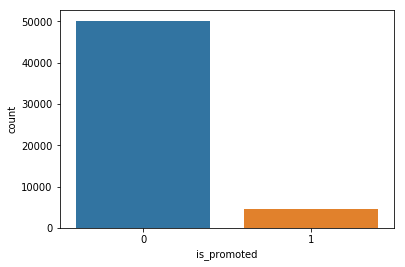

In [62]:
sns.countplot(train_data.is_promoted)

#### Note:
1. Highly imbalanced data so balancing it using smote

In [63]:
train_datas = train_data.copy(deep=True)

In [64]:
y_trains = train_datas['is_promoted']
train_datas.drop(labels=['is_promoted'],axis=1,inplace=True)
X_trains = train_datas
columns = train_datas.columns

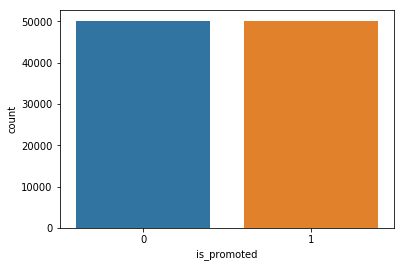

In [66]:
smote = SMOTE(random_state=9, kind="borderline2")
X_samples, y_samples = smote.fit_sample(X_trains, y_trains)
X_samples = pd.DataFrame(data=X_samples,columns=columns )
y_samples= pd.DataFrame(data=y_samples,columns=["is_promoted"])
sns.countplot(y_samples["is_promoted"])

In [68]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(X_samples))
print("Number of Not Promoted in oversampled data",len(y_samples[y_samples["is_promoted"]==0]))
print("No.of Promoted in oversampled data",len(y_samples[y_samples["is_promoted"]==1]))
print("Proportion of Not Promoted data in oversampled data is ",len(y_samples[y_samples["is_promoted"]==0])/len(X_samples))
print("Proportion of Promoted data in oversampled data is ",len(y_samples[y_samples["is_promoted"]==1])/len(X_samples))

length of oversampled data is  100280
Number of Not Promoted in oversampled data 50140
No.of Promoted in oversampled data 50140
Proportion of Not Promoted data in oversampled data is  0.5
Proportion of Promoted data in oversampled data is  0.5


In [69]:
train_datas = pd.concat([X_samples,y_samples],axis=1)

## Saving Files

In [70]:
train_data.to_csv('train_data.csv')
train_datas.to_csv('train_datas.csv')
test_data.to_csv('test_data.csv')